In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

file_path = "Updated_Merged_Dataset.csv"
merged_df = pd.read_csv(file_path)

In [2]:
selected_features = ['HDI', 'TC', 'TD', 'STI', 'POP']
df = merged_df[selected_features + ['GDPCAP']].copy()
df['GDPCAP'] = df['GDPCAP'].astype(float)
X = df[selected_features]
y = df['GDPCAP']

k_best = SelectKBest(f_regression, k=3)
X_new = k_best.fit_transform(X, y)
selected_k_features = [selected_features[i] for i in k_best.get_support(indices=True)]
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_new, y, test_size=0.25, random_state=42)

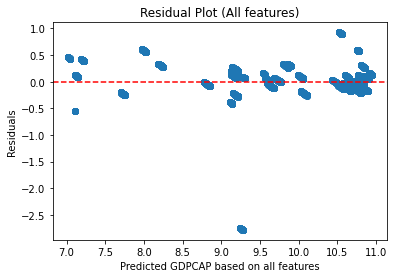

In [8]:
X_train_k_const = sm.add_constant(X_train_k)
model_k = sm.OLS(y_train_k, X_train_k_const).fit()
predicted_values_k = model_k.predict(X_train_k_const)

residuals_k = y_train_k - predicted_values_k
plt.scatter(predicted_values_k, residuals_k)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted GDPCAP based on all features')
plt.ylabel('Residuals')
plt.title('Residual Plot (All features)')
plt.show()

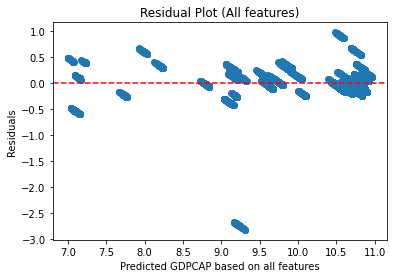

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
predicted_values = model.predict(X_train_const)

residuals = y_train - predicted_values
plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted GDPCAP based on all features')
plt.ylabel('Residuals')
plt.title('Residual Plot (All features)')
plt.show()

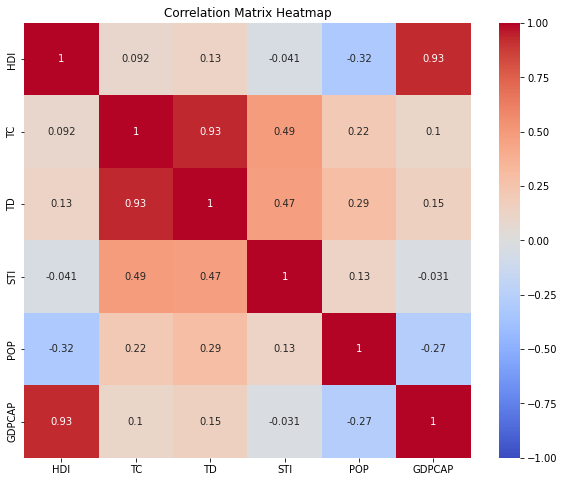

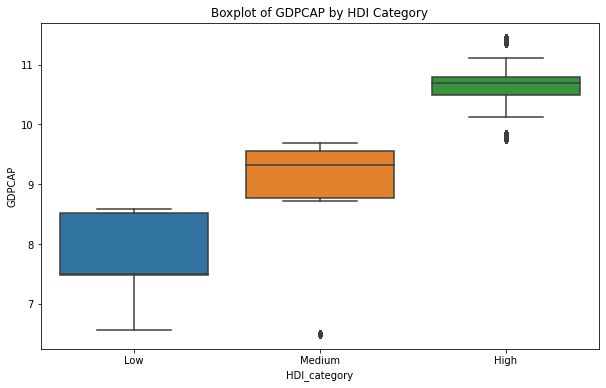

In [6]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

df['HDI_category'] = pd.cut(df['HDI'], bins=3, labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='HDI_category', y='GDPCAP', data=df)
plt.title('Boxplot of GDPCAP by HDI Category')
plt.show()

In [9]:
r2 = model.rsquared
adj_r2 = model.rsquared_adj
mae = mean_absolute_error(y_train, predicted_values)
mse = mean_squared_error(y_train, predicted_values)
rmse = sqrt(mse)
f_statistic = model.fvalue
p_value = model.f_pvalue
coefficients = model.params
p_values = model.pvalues

print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("F-statistic:", f_statistic)
print("P-value:", p_value)
print("Coefficients:\n", coefficients)
print("P-values:\n", p_values)

R-squared: 0.8633634232586145
Adjusted R-squared: 0.8632908908365201
MAE: 0.23772053377197447
MSE: 0.19820693609312037
RMSE: 0.445204375644625
F-statistic: 11903.13791169477
P-value: 0.0
Coefficients:
 const    4.033922
HDI      7.091244
TC      -0.020014
TD       0.030375
STI     -0.005713
POP      0.012111
dtype: float64
P-values:
 const    0.000000e+00
HDI      0.000000e+00
TC       4.888714e-11
TD       7.740767e-17
STI      4.857382e-01
POP      6.099980e-05
dtype: float64
